# Pymaceuticals Inc.
---

### Analysis

- The first observation that I would like to make is the correlation between the weight of the mouse and the size of its tumor. There is a strong postive correlation between these two variables with an r-value of around 0.83. Therefore, it can be inferred that the larger the mouse, the larger the size of it's tumor will be. 

- The second observation that can be made is that there are certain drugs used to treat the size of the tumor. From the boxplot we can see Infubanol and Ceftamin are treating tumors that are significantly larger. It can be inferred that these are stronger treatments to reduce the size of the tumor. On the other hand, Ramicane and Capomulin are used on tumors that are generally smaller. It can be inferred that these drugs are not as strong.

- The third observation is that there is a relatively fair distrubution of the sex of the mice. An inference can be made that the observed drug treaments have no bias on gender; they work equally as well.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = merged_data["Mouse ID"].unique()
len(number_of_mice)

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID']
dup_mice_ID

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_table = merged_data.loc[merged_data["Mouse ID"] == "g989", :]
dup_mice_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data[merged_data['Mouse ID'].isin(dup_mice_ID)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice1 = clean_df["Mouse ID"].unique()
len(number_of_mice1)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
var = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()


summary_table = pd.DataFrame({"Mean Tumor Volume": mean,
                             "Median Tumor Volume": median,
                             "Variance Tumor Volume": var,
                             "Standard Deviation Tumor Volume": std,
                             "SEM Tumor Volume": sem})

summary_table

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_table = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
agg_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

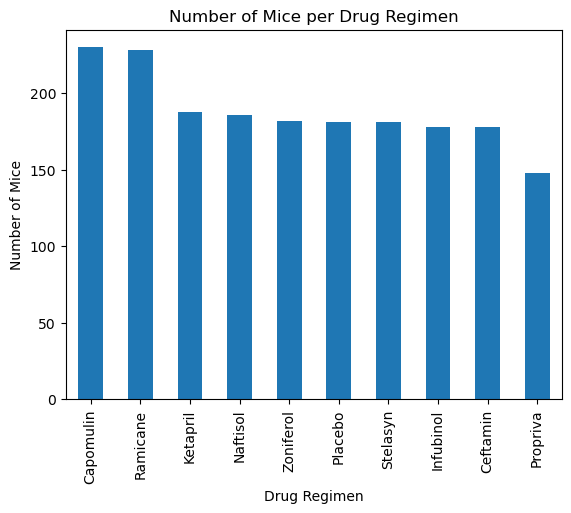

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
num_mice = clean_df["Drug Regimen"].value_counts()

num_mice.plot(kind="bar")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")
plt.show()

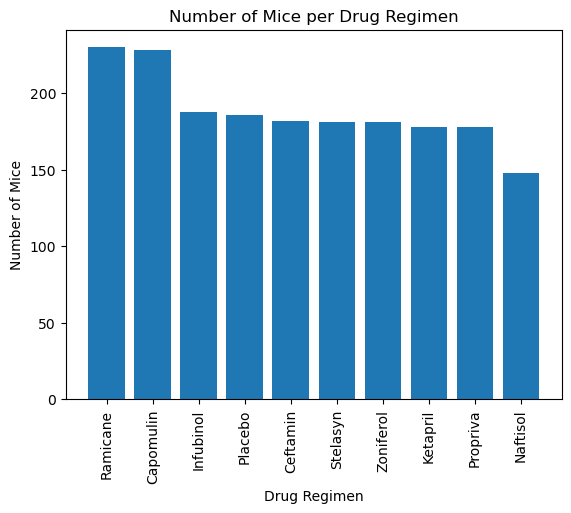

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = clean_df["Drug Regimen"].unique()
y_axis = clean_df["Drug Regimen"].value_counts()

plt.bar(x_axis, y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")
plt.xticks(rotation = "vertical")
plt.show()

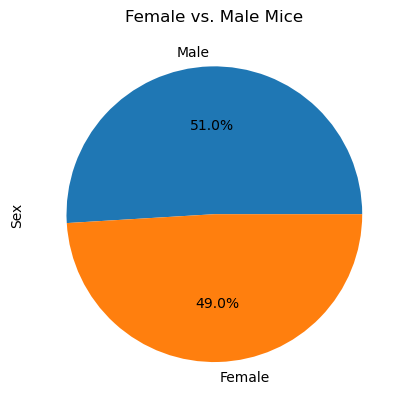

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie_chart = clean_df["Sex"].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Female vs. Male Mice")
plt.show()

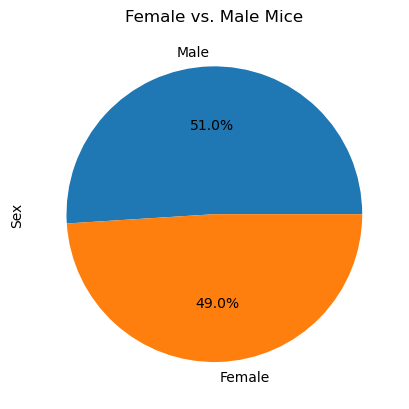

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [51, 49]

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ramicane = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane",:]
infubinol = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:]
ceftamin = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]
# Start by getting the last (greatest) timepoint for each mouse
capomulin_greatest = capomulin.groupby("Mouse ID").max()["Timepoint"]
capomulin_df = pd.DataFrame(capomulin_greatest)

ramicane_greatest = ramicane.groupby("Mouse ID").max()["Timepoint"]
ramicane_df = pd.DataFrame(ramicane_greatest)

infubinol_greatest = infubinol.groupby("Mouse ID").max()["Timepoint"]
infubinol_df = pd.DataFrame(infubinol_greatest)

ceftamin_greatest = ceftamin.groupby("Mouse ID").max()["Timepoint"]
ceftamin_df = pd.DataFrame(ceftamin_greatest)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drug_df = pd.concat([capomulin_df, ramicane_df, infubinol_df, ceftamin_df])

merged_df = pd.merge(drug_df, clean_df, on=("Mouse ID", "Timepoint"))

merged_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,x226,0,Ceftamin,Male,23,28,45.000000,0
96,x581,45,Ceftamin,Female,19,28,64.634949,3
97,x822,45,Ceftamin,Male,3,29,61.386660,3
98,y769,45,Ceftamin,Female,6,27,68.594745,4


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(treatment_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq 

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = treatment_df.loc[(treatment_df < lower_bound) | (treatment_df > upper_bound)]



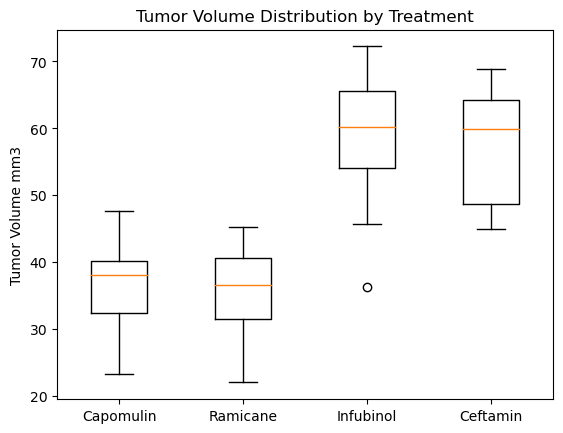

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_list, labels=treatments)
plt.ylabel("Tumor Volume mm3")
plt.title("Tumor Volume Distribution by Treatment")
plt.show()

## Line and Scatter Plots

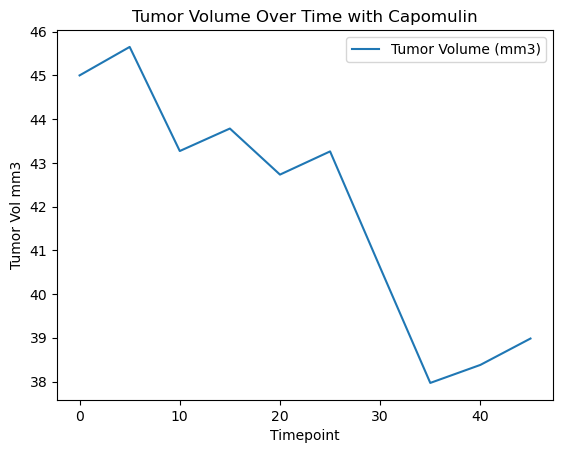

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin
mouse_id = "b128"

lineplot_df = clean_df.loc[clean_df["Mouse ID"] == mouse_id]
lineplot_df.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Vol mm3")
plt.title("Tumor Volume Over Time with Capomulin")
plt.show()

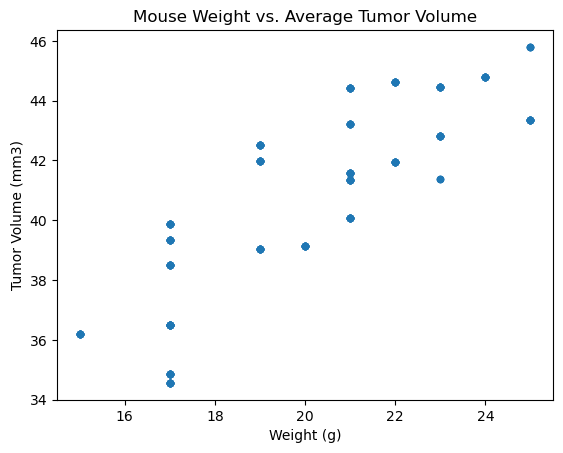

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_vol = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

tumor_weight = pd.merge(avg_tumor_vol, capomulin[["Mouse ID", "Weight (g)"]], on="Mouse ID")

tumor_weight.plot(kind="scatter", x="Weight (g)", y = "Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.83


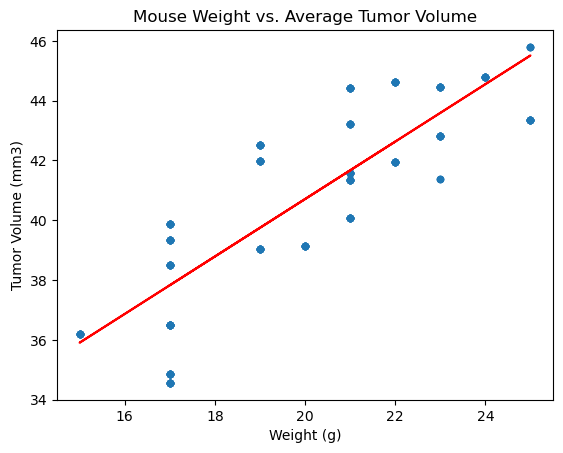

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

correlation = tumor_weight['Weight (g)'].corr(tumor_weight['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {correlation:.2f}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(tumor_weight["Weight (g)"], tumor_weight["Tumor Volume (mm3)"])
regress_values = tumor_weight["Weight (g)"] * slope + intercept

tumor_weight.plot(kind="scatter", x="Weight (g)", y = "Tumor Volume (mm3)")
plt.plot(tumor_weight["Weight (g)"],regress_values,"r-")
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.show()

